#types of classification
1.Binary
2.Multiclass
3.Multilabel

In [11]:
from sklearn.datasets import make_circles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
samples =1000
x,y=make_circles(n_samples=samples,noise=0.03,random_state=42)
x,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]], shape=(1000, 2)),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1

In [12]:
circles = pd.DataFrame({"x0":x[:,0], "x1":x[:,1],"label":y})
circles

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


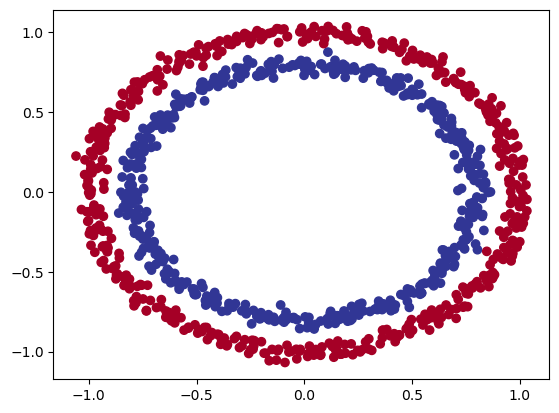

In [13]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu);

In [14]:
#ip and op shapes
x.shape,y.shape

((1000, 2), (1000,))

In [17]:
#modelling
import tensorflow as tf
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model1.compile(loss=tf.keras.losses.BinaryCrossentropy,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])
model1.fit(x,y,epochs=5)

Epoch 1/5


I0000 00:00:1755600666.372146   17398 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1725 MB memory:  -> device: 0, name: NVIDIA GeForce MX350, pci bus id: 0000:01:00.0, compute capability: 6.1
I0000 00:00:1755600666.987790   18088 service.cc:152] XLA service 0x7f1dec016de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1755600666.987808   18088 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce MX350, Compute Capability 6.1
2025-08-19 16:21:07.010442: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1755600667.037029   18088 cuda_dnn.cc:529] Loaded cuDNN version 91002


29/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4444 - loss: 6.3178   

I0000 00:00:1755600667.236836   18088 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4472 - loss: 6.2250
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4376 - loss: 5.0671
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4404 - loss: 4.3351
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4812 - loss: 0.7546 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4865 - loss: 0.7133 


In [18]:
#accuracy is so low so we can use 200 epochs and see
model1.fit(x,y,epochs=200,verbose=0)
model1.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

In [20]:
#since we are working in binary classification and giving the accuracy of 60-70%
#so lets create a model with extra layers..to get more accuracy

tf.random.set_seed(42)

model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["accuracy"])

model2.fit(x,y,epochs=100,verbose=0)

In [21]:
model2.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4955 - loss: 0.6931


[0.6932770013809204, 0.5]

In [26]:
#improving the model by increase layer and change the optimizer function and fit the model for more epochs
tf.random.set_seed(42)
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model3.fit(x,y,epochs=100,verbose=0)



In [28]:
model3.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5054 - loss: 0.6916


[0.694547176361084, 0.4869999885559082]

In [27]:
model3.predict(x)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


array([[0.517014  ],
       [0.46512577],
       [0.46343186],
       [0.48526752],
       [0.48987392],
       [0.48213878],
       [0.4996653 ],
       [0.5163578 ],
       [0.470858  ],
       [0.49926445],
       [0.45864666],
       [0.5198632 ],
       [0.49658322],
       [0.5079998 ],
       [0.49976724],
       [0.48337862],
       [0.45171896],
       [0.4801469 ],
       [0.4592543 ],
       [0.4556878 ],
       [0.5159615 ],
       [0.4819812 ],
       [0.47283626],
       [0.5172202 ],
       [0.46447894],
       [0.45973358],
       [0.51235545],
       [0.5137505 ],
       [0.48539004],
       [0.503494  ],
       [0.464337  ],
       [0.4954003 ],
       [0.50011575],
       [0.52220446],
       [0.46948817],
       [0.47192168],
       [0.47760186],
       [0.51383835],
       [0.48611224],
       [0.5227532 ],
       [0.4567761 ],
       [0.514259  ],
       [0.4542414 ],
       [0.51271033],
       [0.45166126],
       [0.45249388],
       [0.49396923],
       [0.507

In [29]:
def plot_decison_boundary(model,x,y):
    xmin,xmax=x[:,0].min() - 0.1,x[:,0].max()+0.1
    ymin,ymax=x[:,1].min() - 0.1,x[:,1].max()+0.1
    xx,yy=np.meshgrid(np.linspace(xmin,xmax,100),np.linspace(ymin,ymax,100))
    x_in=np.c_[xx.ravel(),yy.ravel()]
    
    ypred = model.predict(x_in)
    
    if len(ypred[0])> 1:
        print("doing multiclass classification")
        ypred=np.argmax(ypred,axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        ypred=np.round(ypred).reshape(xx.shape)
    
    plt.contourf(xx,yy,ypred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(x[:,0],x[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


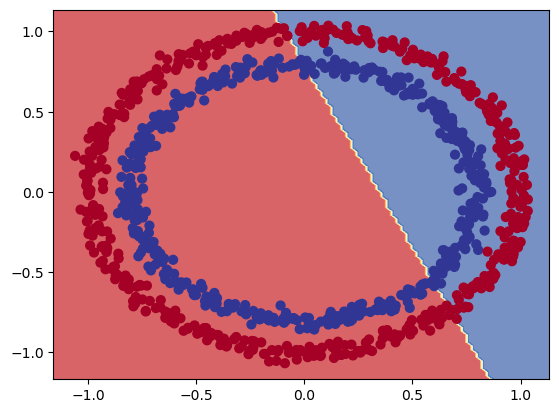

In [32]:
plot_decison_boundary(model3,x=x,y=y)

In [34]:
#non linearity 
tf.random.set_seed(42)
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.linear)
])
model4.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

hist = model4.fit(x,y,epochs=100,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4527 - loss: 6.7926
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4527 - loss: 6.7887
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4527 - loss: 6.7867
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4528 - loss: 6.7657
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4528 - loss: 6.7292
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4529 - loss: 6.7084
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4529 - loss: 6.7062
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4529 - loss: 6.6887
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4545 - loss: 6.6339
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4543 - loss: 6.5647
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4557 - loss: 6.5579
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

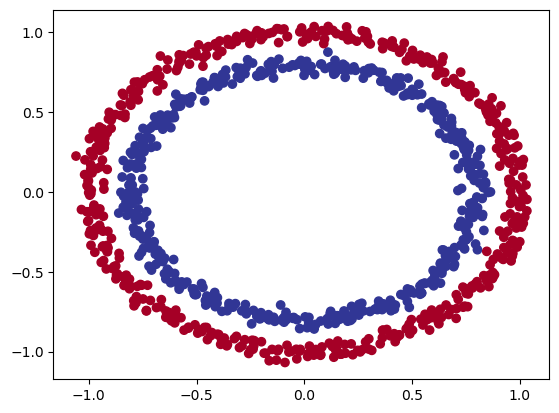

In [35]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
doing binary classification


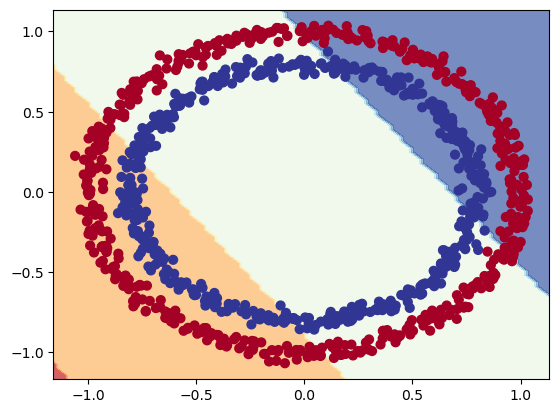

In [36]:
plot_decison_boundary(model=model4,x=x,y=y)

In [37]:
#still in the activation of the model we have passed the linear format..so let change it to non linear
tf.random.set_seed(42)
model5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu")
])
model5.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

hist = model5.fit(x,y,epochs=100,verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4278 - loss: 4.8987
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4383 - loss: 4.8491
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4320 - loss: 4.8301
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4315 - loss: 4.7577
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4336 - loss: 4.7192
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4348 - loss: 4.6978
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4348 - loss: 4.6966 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4362 - loss: 4.6624
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4366 - loss: 4.6041
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4362 - loss: 4.5466
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4362 - loss: 4.5444
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accurac

In [38]:
model5.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4758 - loss: 2.8911


[3.1497275829315186, 0.4659999907016754]

In [45]:
#lets do multi layer and then see
tf.random.set_seed(42)
model6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])
model6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

hist = model6.fit(x,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4830 - loss: 8.3336
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accu

In [46]:
model6.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4955 - loss: 8.1322 


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification


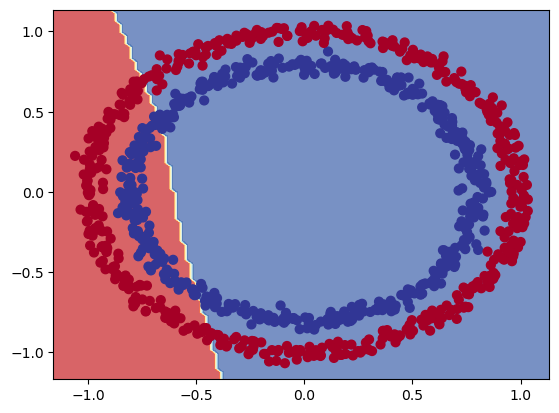

In [47]:
plot_decison_boundary(model=model6,x=x,y=y)

In [48]:
#to improve accuracy
tf.random.set_seed(42)
model7=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

hist = model7.fit(x,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5090 - loss: 0.7006
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4870 - loss: 0.6974
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4616 - loss: 0.6957
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4266 - loss: 0.6945
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4827 - loss: 0.6936
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4864 - loss: 0.6929
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4856 - loss: 0.6922
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5324 - loss: 0.6917
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5276 - loss: 0.6911
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5320 - loss: 0.6905
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5385 - loss: 0.6900
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy

In [49]:
model7.evaluate(x,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9919 - loss: 0.2407


[0.23947399854660034, 0.9919999837875366]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
doing binary classification


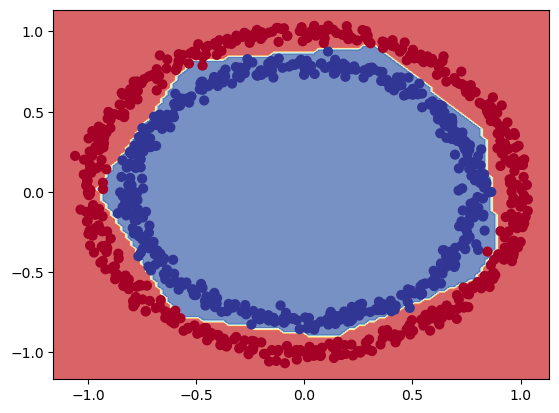

In [50]:
plot_decison_boundary(model=model7,x=x,y=y)

In [58]:
#evaluating and improving our classification using train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape
#recreating our model
tf.random.set_seed(42)
model8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model8.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

hist = model8.fit(xtrain,ytrain,epochs=25)


Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5223 - loss: 0.6851
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6004 - loss: 0.6750
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6339 - loss: 0.6621 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7089 - loss: 0.6438
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7594 - loss: 0.6195 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7727 - loss: 0.5883 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.5404 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.4908 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8641 - loss: 0.4462 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8924 - loss: 0.4041 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9133 - loss: 0.3657 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9

In [53]:
model8.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9873 - loss: 0.0835


[0.08021809905767441, 0.9900000095367432]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classification


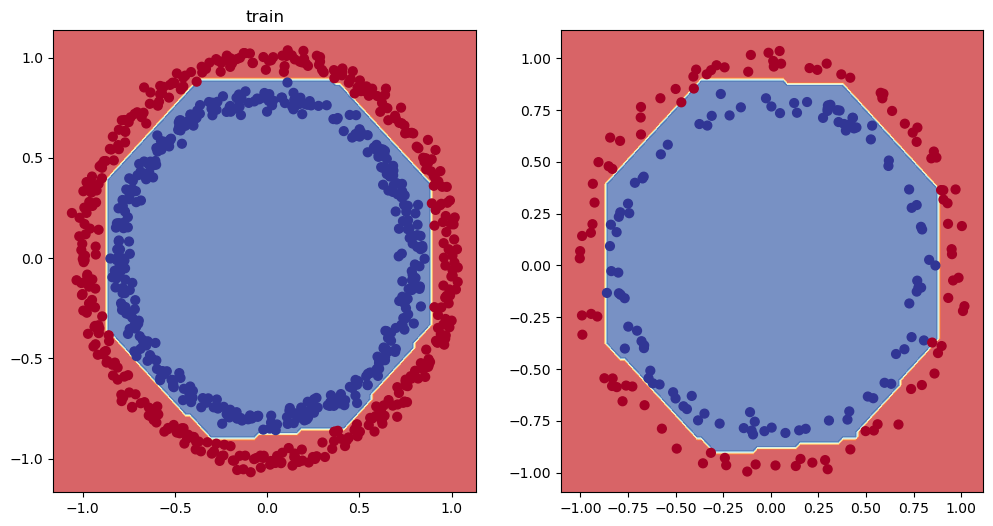

In [54]:

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decison_boundary(model=model8,x=xtrain,y=ytrain)
plt.subplot(1,2,2)
plot_decison_boundary(model=model8,x=xtest,y=ytest)

In [59]:
pd.DataFrame(hist.history)

,accuracy,loss
0,0.52625,0.684934
1,0.60125,0.674408
2,0.65250,0.660375
3,0.71750,0.641697
4,0.78250,0.614559
5,0.79125,0.578411
6,0.80625,0.530340
7,0.84750,0.480756
8,0.86375,0.435979
9,0.88500,0.394948


Text(0.5, 1.0, 'model_8 loss curves')

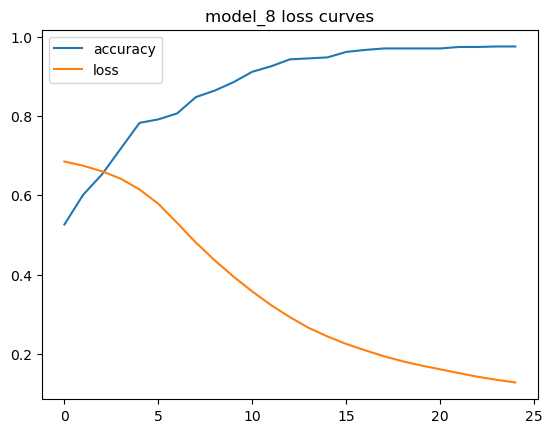

In [60]:
pd.DataFrame(hist.history).plot()
plt.title("model_8 loss curves")

In [62]:
#find the best learning rate(callback)
tf.random.set_seed(42)
model9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model9.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])


#create a learning rate call back
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-4 * 10**(epoch/20))
hist9 = model9.fit(xtrain,ytrain,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5187 - loss: 0.6933 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5167 - loss: 0.6932 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5120 - loss: 0.6932 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5077 - loss: 0.6931 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5106 - loss: 0.6931 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5085 - loss: 0.6930 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5060 - loss: 0.6930 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5064 - loss: 0.6929 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5037 - loss: 0.6928 - learning_

<Axes: >

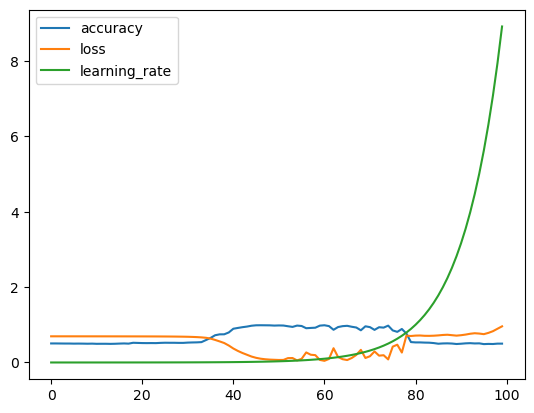

In [64]:
pd.DataFrame(hist9.history).plot()

Text(0.5, 1.0, 'learning rate vs loss')

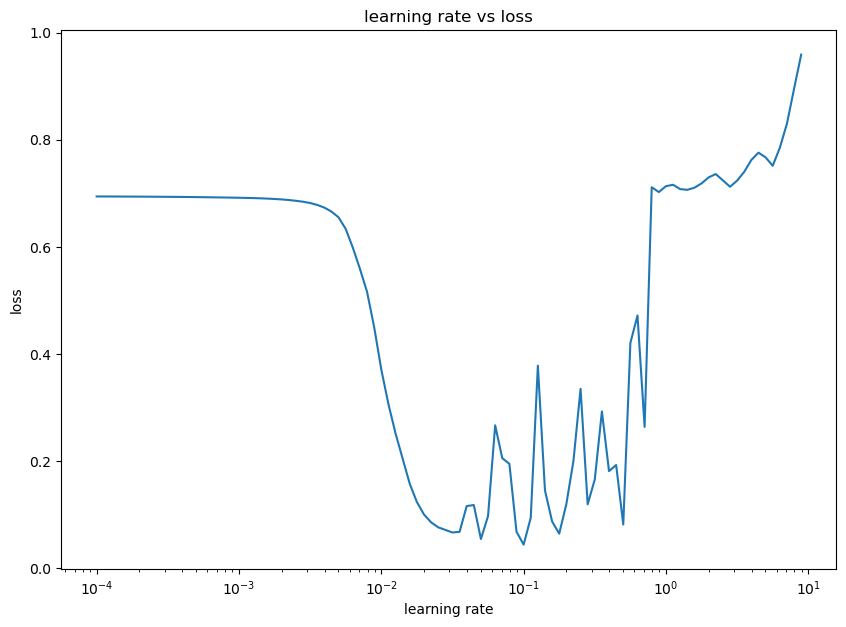

In [65]:
#learming rarte vs loss
lrs=1e-4 *(10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,hist9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss")

In [69]:
#high idea learning rate trying
tf.random.set_seed(42)
model10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model10.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=["accuracy"])



hist10 = model10.fit(xtrain,ytrain,epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5453 - loss: 0.7018
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5862 - loss: 0.6759 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6128 - loss: 0.6593 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6942 - loss: 0.6212 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.5610 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8245 - loss: 0.4838 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8970 - loss: 0.3999 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9179 - loss: 0.3353 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.2911
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9305 - loss: 0.2473 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9378 - loss: 0.2114 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.

In [70]:
model10.evaluate(xtest,ytest)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9764 - loss: 0.0814


[0.10450400412082672, 0.9700000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step
doing binary classification


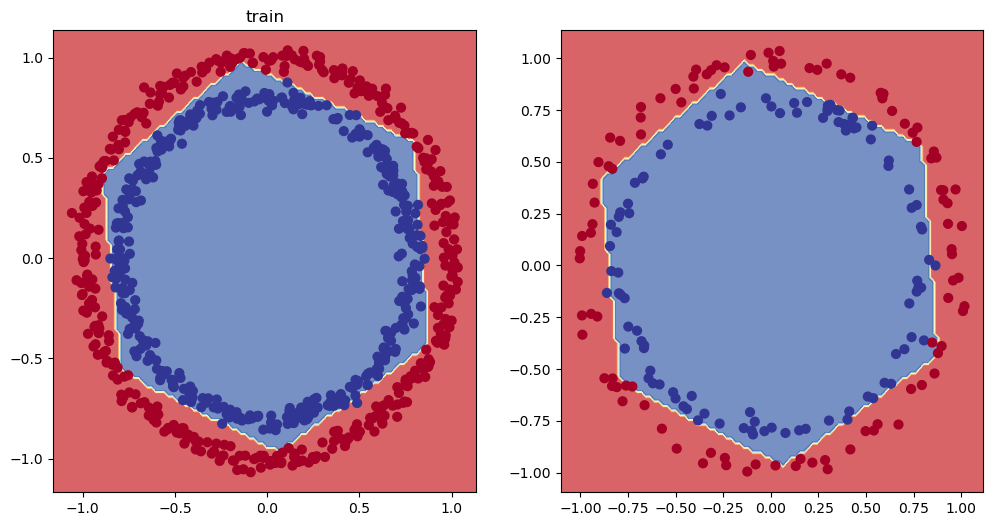

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decison_boundary(model=model10,x=xtrain,y=ytrain)
plt.subplot(1,2,2)
plot_decison_boundary(model=model10,x=xtest,y=ytest)

In [75]:
#lets work with confusion matrix
ypred = model10.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,tf.round(ypred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[97,  3],
       [ 3, 97]])